<a href="https://colab.research.google.com/github/aliceson89/ML_Prediction/blob/main/Midterm_pythonmachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

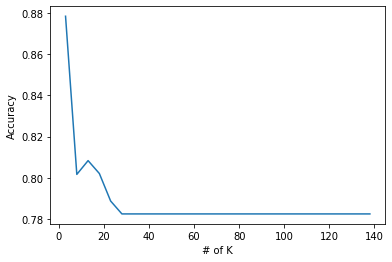

the best number of k 3
KNN accuracy : 0.79487179
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
SVC accuracy : 0.87179487
GNB accuracy : 0.66666667
lgbm_wrapper accuracy : 0.87179487
{'learning_rate': 0.05, 'max_depth': -1, 'min_data_in_leaf': 20, 'n_estimators': 800, 'num_leaves': 25}
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.89      0.96      0.92        25

    accuracy                           0.90        39
   macro avg       0.90      0.87      0.88        39
weighted avg       0.90      0.90      0.90        39

LGBM accuracy : 0.89743590
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.92      0.96      0.94        25

    accuracy                           0.92        39
   macro avg       0.92      0.91      0.92        39
weighted avg       0.92      0.92      0.92        39

Hard Voting Accuracy : 0.92307692


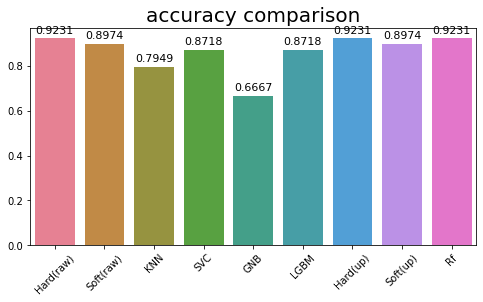

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from lightgbm import LGBMClassifier

from sklearn.ensemble import RandomForestClassifier



knn = KNeighborsClassifier()
svc = SVC(probability=True)
gnb = GaussianNB()
lgbm = LGBMClassifier()

df = pd.read_csv("https://docs.google.com/uc?export=download&id=1lrrd7LjEaEPIyI_Q5AiLLmglrfhmYNji")
#print(df.head())
df.shape
df.info()
df.describe()
df.drop(['RPDE','DFA','spread1','spread2','D2','PPE'],axis=1,inplace = True)
df.dropna(axis=0)
#print(df.head())
X = df[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR','HNR']]
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=94)
print(X_train.shape[0])# 학습 데이터의 갯수 확인
print(X_test.shape[0])# 테스트 데이터의 갯수 확인
print(y_train.shape[0])# 학습 데이터의 갯수 확인
print(y_test.shape[0])# 테스트 데이터의 갯수 확인


hard_voting_model_1 = VotingClassifier(estimators=[('KNN',knn),('SVC',svc),('Gaussian Naive Bayes',gnb),('Light GBM',lgbm)],weights=[1,1,1,1],voting='hard')
hard_voting_model_1.fit(X_train,y_train)
hard_voting_predicted=hard_voting_model_1.predict(X_test)
print('Hard Voting Accuracy : %.8f' % accuracy_score(y_test, hard_voting_predicted))

soft_voting_model_1 = VotingClassifier(estimators=[('KNN',knn),('SVC',svc),('Gaussian Naive Bayes',gnb),('Light GBM',lgbm)],weights=[1,1,1,1],voting='soft')
soft_voting_model_1.fit(X_train,y_train)
soft_voting_predicted=soft_voting_model_1.predict(X_test)
print('Soft Voting Accuracy : %.8f' % accuracy_score(y_test, soft_voting_predicted))

max_k_range = X_train.shape[0]
#print('max_k_range is')
#print(max_k_range)
#141 데이터 이상부터는 null 값이 나와서 에러가 발생해서 범위를 141까지만 지정
k_list = list(np.arange(3,141,5))
print(k_list, end='')

cross_validation_scores = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X_train, y_train,cv=10,scoring='accuracy')
    cross_validation_scores.append(scores.mean())

print(cross_validation_scores)

plt.plot(k_list,cross_validation_scores)
plt.xlabel('# of K')
plt.ylabel('Accuracy')
plt.show()

cvs = cross_validation_scores
k = k_list[cvs.index(max(cross_validation_scores))]
print('the best number of k ' + str(k))
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('KNN accuracy : %.8f' % accuracy_score(y_test, pred))

def svc_param_selection(x,y,nfolds):
    svm_parameters=[{
        'kernel':['rbf'],
        'gamma':[0.00001,0.0001,0.001,0.01,0.1,1],
        'C': [0.01,0.1,1,10,100,1000]
    }]
    clf = GridSearchCV(SVC(probability=True),svm_parameters,cv=nfolds)
    clf.fit(x,y)
    print(clf.best_params_)
    return clf

clf = svc_param_selection(X_train,y_train,10)
y_true, y_pred = y_test, clf.predict(X_test)
print('SVC accuracy : %.8f' % accuracy_score(y_true, y_pred))

gnb=GaussianNB()
gnb.fit(X_train,y_train)
expected=y_test
predicted = gnb.predict(X_test)
print('GNB accuracy : %.8f' % accuracy_score(expected, predicted))

lgbm_wrapper = LGBMClassifier(n_estimators=200)

evals = [(X_test,y_test)]
lgbm_wrapper.fit(X_train,y_train,early_stopping_rounds=100,eval_metric='logloss', eval_set=evals,verbose=False)
prediction= lgbm_wrapper.predict(X_test)
print('lgbm_wrapper accuracy : %.8f' % accuracy_score(y_test, prediction))

def lgbm_param_selection(x,y,nfolds):
    lgbm_parameters = [{
        'learning_rate' : [0.05,0.1,0.15],
        'n_estimators' : [400,800],
        'num_leaves' : [25,31,37],
        'min_data_in_leaf' : [15, 20, 25],
        'max_depth': [-1,50,100]
    }]
    lgbm_grid = GridSearchCV(LGBMClassifier(eval_metric='logloss'),lgbm_parameters,cv = nfolds)
    lgbm_grid.fit(x,y)
    print(lgbm_grid.best_params_)
    return lgbm_grid

lgbm_grid= lgbm_param_selection(X_train,y_train,3)
prediction = lgbm_grid.predict(X_test)
print(metrics.classification_report(y_test,prediction))
print('LGBM accuracy : %.8f' % accuracy_score(y_test, prediction))


hard4_voting_model0= VotingClassifier(estimators=[('KNN',knn),('SVM',clf),('Gaussian Naive Bayes',gnb),('Light GBM',lgbm_wrapper)],weights=[1,1,1,1],voting='hard')
hard4_voting_model0.fit(X_train,y_train)
hard4_voting_predicted=hard4_voting_model0.predict(X_test)
print(metrics.classification_report(y_test, hard4_voting_predicted))
print('Hard Voting Accuracy : %.8f' % accuracy_score(y_test, hard4_voting_predicted))

soft4_voting_model0= VotingClassifier(estimators=[('KNN',knn),('SVM',clf),('Gaussian Naive Bayes',gnb),('Light GBM',lgbm_wrapper)],weights=[1,1,1,1],voting='soft')
soft4_voting_model0.fit(X_train,y_train)
soft4_voting_predicted=soft4_voting_model0.predict(X_test)
print(metrics.classification_report(y_test, soft4_voting_predicted))
print('Soft Voting Accuracy : %.8f' % accuracy_score(y_test, soft4_voting_predicted))


rf_clf = RandomForestClassifier(random_state=10)
rf_clf.fit(X_train,y_train)
rf_prediction=rf_clf.predict(X_test)
print(metrics.classification_report(y_test,rf_prediction))
accuracy_rf=accuracy_score(y_test,rf_prediction)
print('Random Forest accuracy : {0:.8f}' .format(accuracy_rf))

print(rf_clf)

rf_param_grid={'n_estimators':[80,100,120],'min_samples_leaf':[1,2,3],'min_samples_split':[2,3,4]}
rf_clf1 = RandomForestClassifier(random_state =10)
grid = GridSearchCV(rf_clf1,param_grid=rf_param_grid,scoring='accuracy', n_jobs=1)
grid.fit(X_train,y_train)

rf_grid_pred = grid.predict(X_test)
accuracy_grid = accuracy_score(y_test,rf_grid_pred)
print('Random Forest Grid accuracy : {0:.8f}' .format(accuracy_grid))
print(grid.best_params_)


fig,ax = plt.subplots(figsize = (8,4))

x_data = np.arange(9)
y_data = [accuracy_score(y_test, hard_voting_model_1.predict(X_test)),
          accuracy_score(y_test, soft_voting_model_1.predict(X_test)),
          accuracy_score(y_test, knn.predict(X_test)),
          accuracy_score(y_test, clf.predict(X_test)),
          accuracy_score(y_test, gnb.predict(X_test)),
          accuracy_score(y_test, lgbm_wrapper.predict(X_test)),
          accuracy_score(y_test, hard4_voting_model0.predict(X_test)),
          accuracy_score(y_test, soft4_voting_model0.predict(X_test)),
          accuracy_score(y_test, rf_clf.predict(X_test))]
g = sns.barplot(ax=ax, palette = 'husl', x = x_data, y= y_data)
g.set_xticklabels(['Hard(raw)','Soft(raw)','KNN','SVC','GNB','LGBM','Hard(up)','Soft(up)','Rf'],rotation=45)
g.axes.set_title('accuracy comparison', fontsize=20)
for p in g.patches:
    g.annotate(format(p.get_height(),'.4f'),(p.get_x() + p.get_width()/2., p.get_height()),ha = 'center', va = 'center', xytext=(0,8),textcoords = 'offset points', size=11)
plt.show()